In [32]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
def f(x):
  return 3*x**2 - 4*x + 5

In [34]:
f(3.0)

20.0

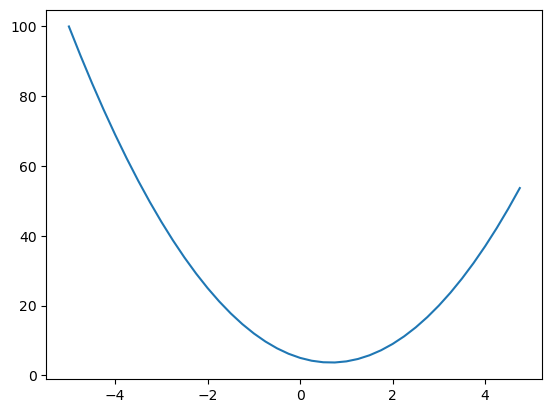

In [35]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [36]:
# what is the derivative? 

h = 0.001
x = 3.0
f(x)

20.0

In [37]:
f(x + h) # slightly greater than 20, h will nudge it higher and function will respond positively

20.014003000000002

In [38]:
f(x + h) - f(x) # how much the function responded in a positive direction 

0.01400300000000243

In [39]:
(f(x + h) - f(x))/h # normalise by the run to get the slope

14.00300000000243

In [40]:
# What happens to the slope at -3 

## Slope will be negative

h = 0.001
x = -3.0
(f(x + h) - f(x))/h 

-21.996999999998934

In [41]:
# The slope at 0

h = 0.001
x = 2/3 # at this point slope is 0
(f(x + h) - f(x))/h 

0.0029999999995311555

In [42]:
# Adding more variables

a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [43]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# evaluate derivative (d) with respect to (a)
d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)  # d1 = 4
print('d2', d2)  # a will be slightly more positive, multiplied by a negative b. Then c adds less, so end up with a slighly lower number. d1 > d2
print('slope', (d2 - d1)/h) # a negative number as d1 > d2

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [44]:
# evaluate derivative (d) with respect to (b)
d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)  # d1 = 4
print('d2', d2)  # b will be more positive, thus a*b will will be more positive. Add c, result in a slightly higher number where d2 > d1. 
print('slope', (d2 - d1)/h) # a positive number as d2 > d1

d1 3.999699999999999
d2 3.99990001
slope 2.0001000000124947


In [45]:
# evaluate derivative (d) with respect to (c)
d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)  # d1 = 4
print('d2', d2)  # a*b unaffected. C a bit higher, result in a slightly bit higher number where d2 > d1. It has gone up by the value of what we added to c.
print('slope', (d2 - d1)/h) # slope is 1 

d1 3.99990001
d2 4.00000001
slope 0.9999999999976694


Build out a value object

In [46]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        # returns a string
        return f"Value(data={self.data})"
    
a = Value(2.0)

In [47]:
a = Value(2.0)
b = Value(-3)
a + b

TypeError: unsupported operand type(s) for +: 'Value' and 'Value'

Modify to add 2 value objects

In [48]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        # returns a string
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
a = Value(2.0)
b = Value(-3)
a + b
a.__add__(b)

Value(data=-1.0)

Implement multiply

In [49]:
class Value:

    def __init__(self, data):
        self.data = data

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out
    
    
a = Value(2.0)
b = Value(-3)
a * b
c = Value(10)
a*b + c
#a.__mul__(b).__add__(c)

Value(data=4.0)

Keep pointers to values

In [50]:
class Value:

    def __init__(self, data, _children=()): # add empty variable "children"
        self.data = data
        self._prev = set(_children) # _prev will be empty set

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other))
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other))
        return out
    
    
a = Value(2.0)
b = Value(-3)
c = Value(10)

d = a*b + c
d

Value(data=4.0)

In [51]:
d._prev

{Value(data=-6.0), Value(data=10)}

Allow to see what operation was involved

In [52]:
class Value:

    def __init__(self, data, _children=(), _op=''): 
        self.data = data
        self._prev = set(_children) # _prev will be empty set
        self._op  = _op

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        return out
    
    
a = Value(2.0)
b = Value(-3)
c = Value(10)

d = a*b + c
d

Value(data=4.0)

Visualise expression code:

In [53]:
import graphviz

In [54]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ data %.4f }" % ( n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

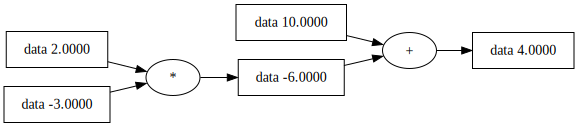

In [55]:
# Visualise 
draw_dot(d)

### *Add labels* 

In [56]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self._prev = set(_children) # _prev will be empty set
        self._op  = _op
        self.label = label

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        return out
    
    
a = Value(2.0, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')
e = a*b; e.label = 'e'
d = a*b + c; d.label = 'd'
f = Value(-2.0, label= 'f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [57]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

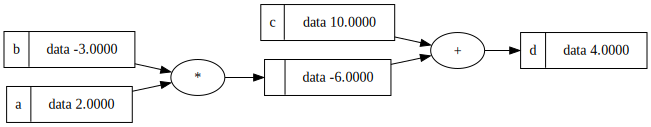

In [58]:
draw_dot(d)

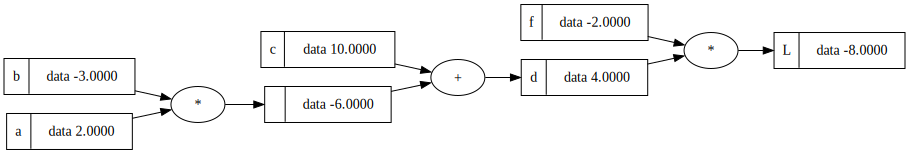

In [59]:
draw_dot(L)

Backpropogation

In [60]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        return out
    
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [61]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

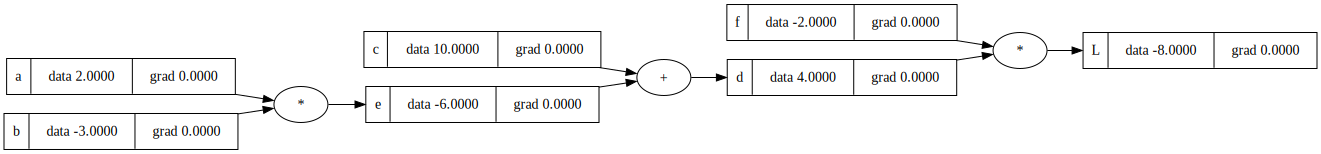

In [62]:
draw_dot(L)

In [63]:
def lol():

    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = a*b + c; d.label = 'd'
    f = Value(-2.0, label= 'f')
    L = d * f; L.label = 'L'
    L1 = L

    a = Value(2.0 +  h, label='a') # derivative in respect to (a) (added + h)
    b = Value(-3, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = a*b + c; d.label = 'd'
    f = Value(-2.0, label= 'f')
    L = d * f; L.label = 'L'
    L2 = L

    print((L2.data - L1.data)/h)
lol()

6.000000000021544


In [64]:
# change L2 by h


def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data + h
  
  print((L2 - L1)/h)
  
lol()

1.000000000000334


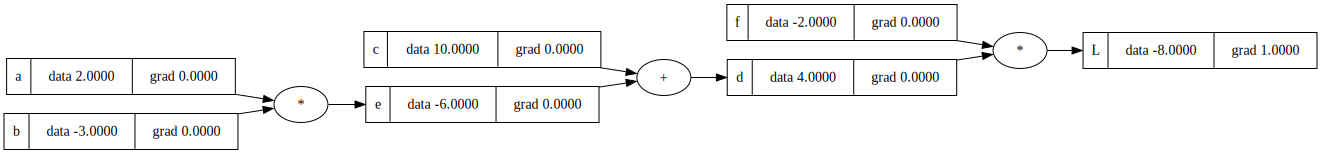

In [65]:
# Change L grad 
L.grad = 1.0
draw_dot(L)

#### *Local derivative at a multiplication node:*

> L = d * f

> dL/dd =? f

> (f(x+h)-f(x))/h

> ((d+h)*f - d*f)/h

> (d*f + h*f - d*f)/h

> (h*f)/h

> f

Thus, dL/dd = f = 4.0


In [66]:
f.grad = 4.0 # is a value of d = 4
d.grad = -2 # is a value of f = -2

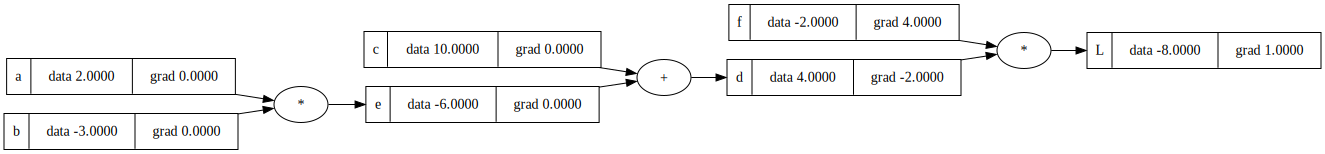

In [67]:
draw_dot(L)

In-line gradient check: derivate in respect to f

In [68]:
# derivate in respect to f

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0 +h, label='f') # derivate in respect to f
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

3.9999999999995595


In-line gradient check: derivate in respect to d

In [69]:
# derivate in respect to d

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b ; e.label = 'e'
  d = e + c; d.label = 'd'
  d.data += h
  f = Value(-2.0, label='f') # derivate in respect to f
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

-2.000000000000668


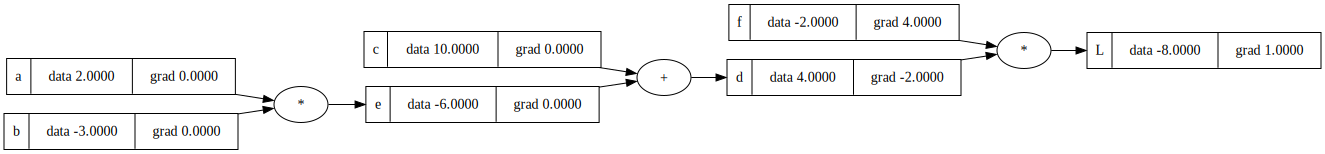

In [70]:
draw_dot(L)

#### *Local derivative at an addition node:*

- Need to derive L in respect to c
- dL / dc 
- also figure out dL / de
- we know the impact of c on d, and d on L 
- so we should be able to figure out how c impacts L

1. What is the local derivative of d in respect to c:

> dd / dc

> d = c + e 

> (f(x+h) - f(x)) / h

- focus on c and it's effect on d

> ((c+h + e) - (c+e) ) / h

> (c + h + e - c - e)/h

> h/h

> 1.0

> dd / dc = 1.0

- By same logic dd / de = 1.0


**Chain rule** 

- Want: dL / dc 

- Know:
> dL / dd = -2
> dd / dc = 1

> dL / dc = (dL / dd) * (dd / dc)
>         = -2 * 1.0 

Set the c and e grad:

In [71]:
c.grad = -2.0
e.grad = -2.0

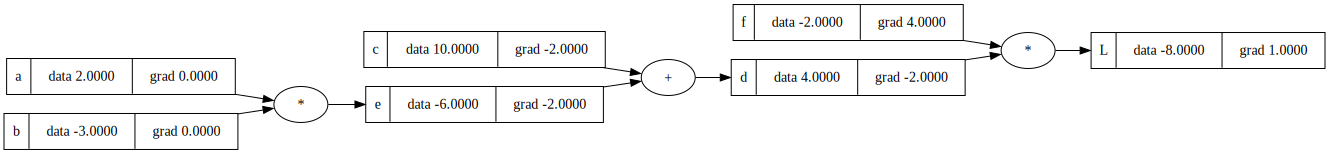

In [72]:
draw_dot(L)

Verify:

In [73]:
# derivate in respect to d

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  c.data += h # expect to see -2 and also the same if done for e.data
  e = a*b ; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f') 
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

-1.9999999999988916


#### *Second application of chain rule* 

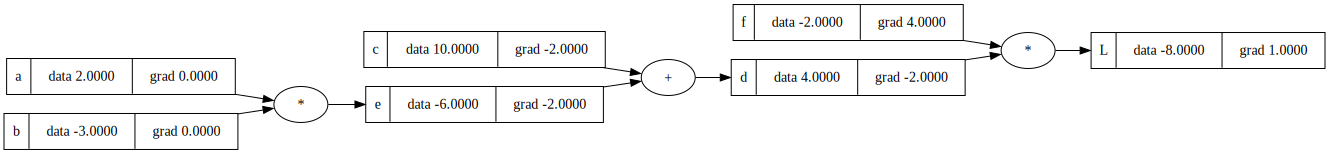

In [74]:
draw_dot(L)

- dL / de = -2.0
- dL / da = (dL / de) * (de / da)

- Multiplication node local gradient:
> e = a * b 

> de / da ? b (from previous proof) : 

In [75]:
a.grad = (-2.0 * -3.00) # chain rule  = (dL / de = -2.0) * b 
b.grad = (-2.0 * 2.00) # chain rule  = (dL / de = -2.0) * a

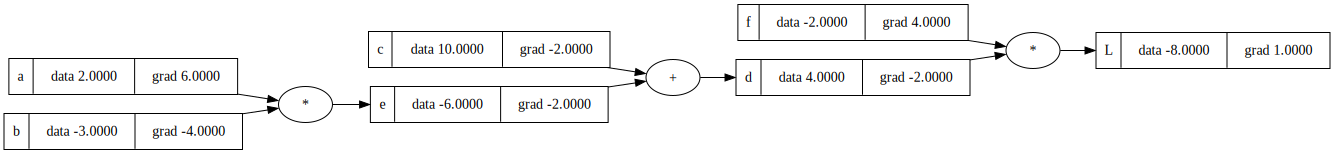

In [76]:
draw_dot(L)

Verify:

In [77]:
# derivate in respect to d

def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h # expect to see -4
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')

  e = a*b ; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f') 
  L = d * f; L.label = 'L'
  L2 = L.data 
  
  print((L2 - L1)/h)
  
lol()

3.9999999999995595


### Summary notes

- Manual backpropogation 
- Iterated through each node one by one and locally applied the chain rule 
- How the operation affected the child nodes
- We recursively applied the chain rule backwards through the application graph

### Nudge inputs to make L increase

In [78]:
a.grad += 0.01 * a.grad
b.grad += 0.01 * b.grad
c.grad += 0.01 * c.grad
f.grad += 0.01 * f.grad

# expect a positive influence on L, and become less negative
# also re-run the forward pass:

e = a * b
d = e + c
L = d * f

print(L.data)

-8.0


### Another example of backpropogation: through a neuron

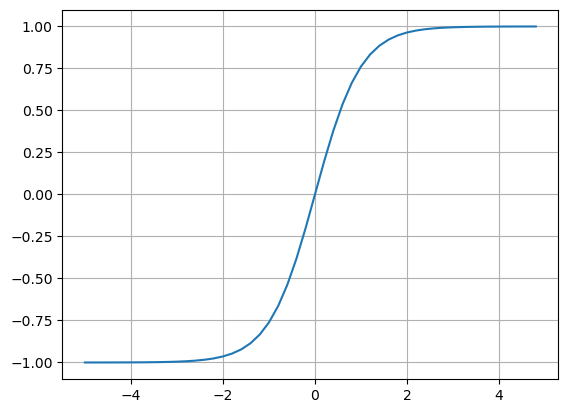

In [79]:
# activation function with tanh
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();


In [80]:
# 2d neuron

# 2 inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2 
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')


# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


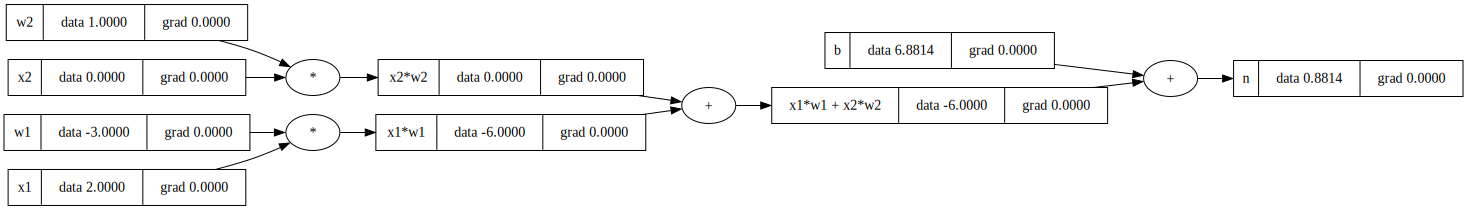

In [81]:
draw_dot(n)

Implement tanh

In [93]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
    
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [95]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

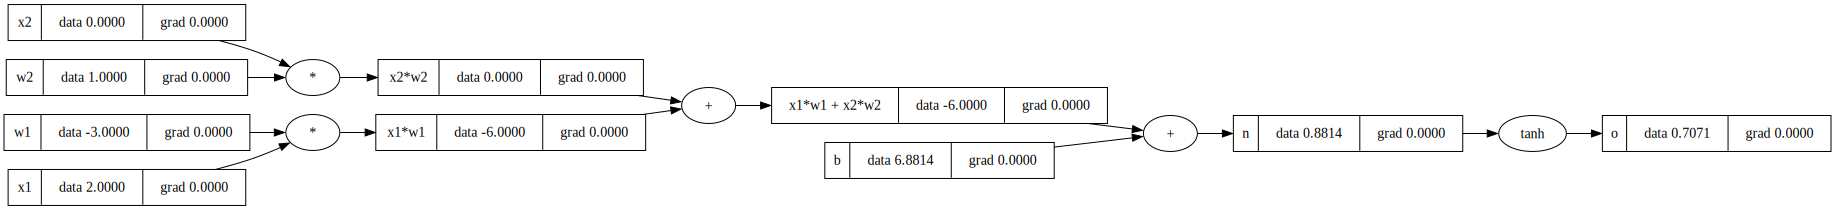

In [96]:
draw_dot(o)

In [97]:
o.grad = 1.0

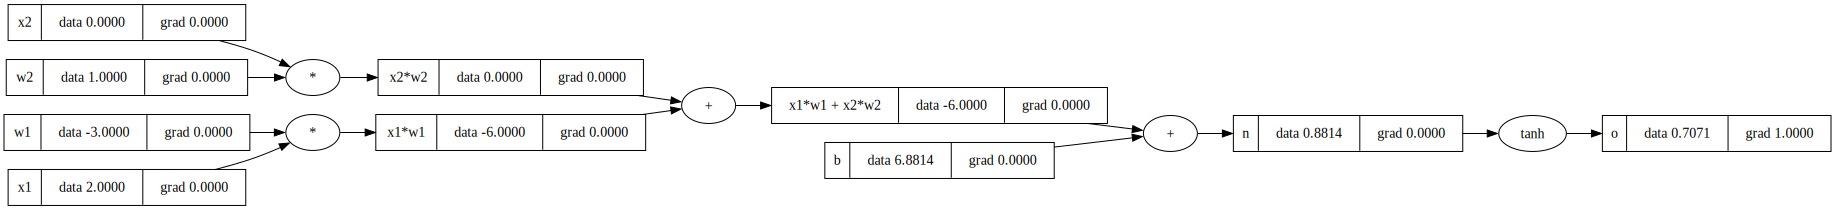

In [99]:
draw_dot(o)

Backpropogate through tanh:

In [103]:
# need to know local derivative of tanh
# o = tanh(n)
# do/dn = 1 - tanh(n)**2
# do/dn = 1 - o**2

In [102]:
o.data

0.7071067811865476

In [101]:
1 - o.data**2

0.4999999999999999

In [105]:
# the local derivative of tanh is 0.499
n.grad = 0.5

Backpropogation at (+) node carries over:

In [106]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

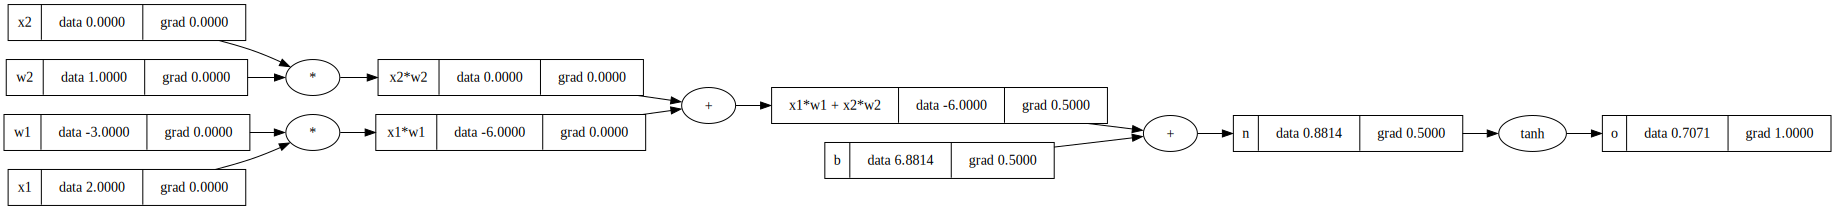

In [107]:
draw_dot(o)

In [112]:
# Backpropogate with (+) node
x1w1.grad = 0.5
x2w2.grad = 0.5

In [114]:
# Backpropogate with (*) node
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

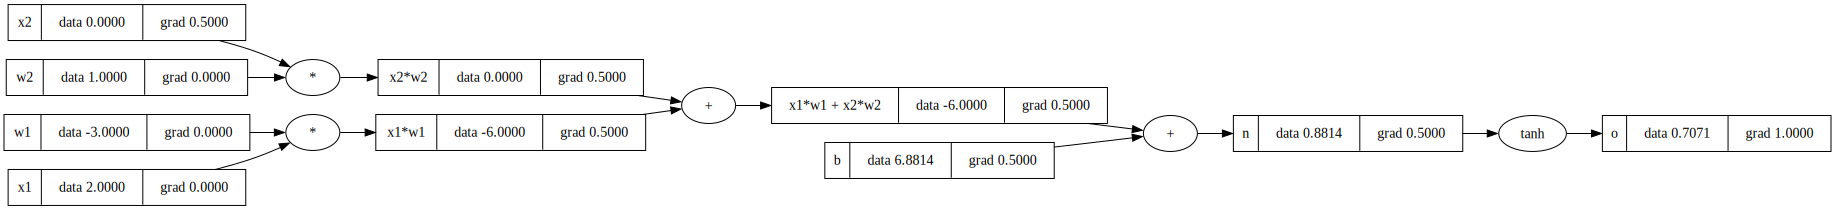

In [115]:
draw_dot(o)

In [116]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

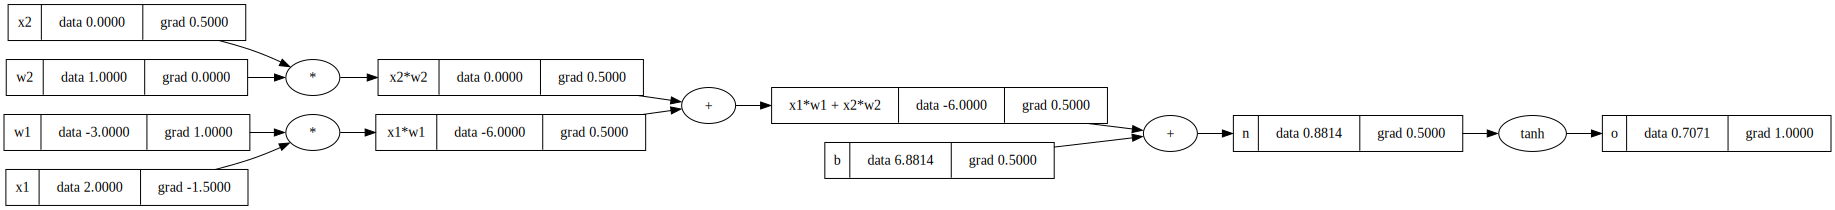

In [117]:
draw_dot(o)

Implement backwarad pass automatically

In [151]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label
        self._backward = lambda: None # by default doesnt do anything 

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        
    
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
        
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
    
        return out
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [152]:
# redefine expression
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

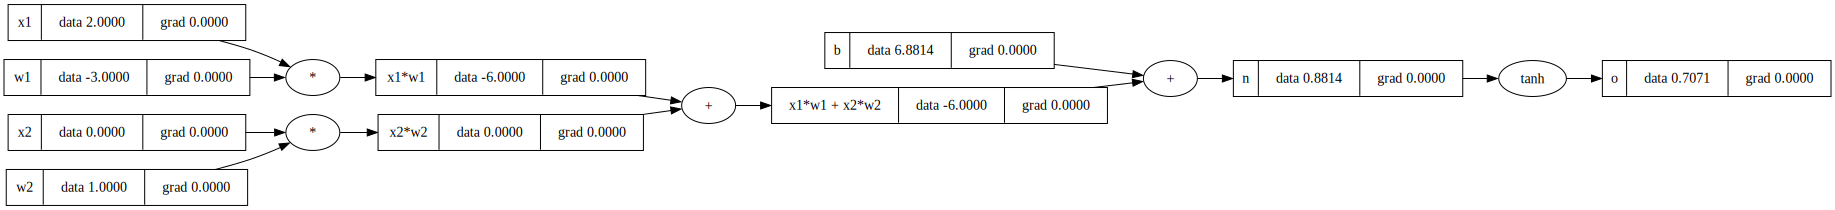

In [153]:
draw_dot(o)

In [154]:
#initialise with 1
o.grad = 1.0

In [155]:
o._backward()

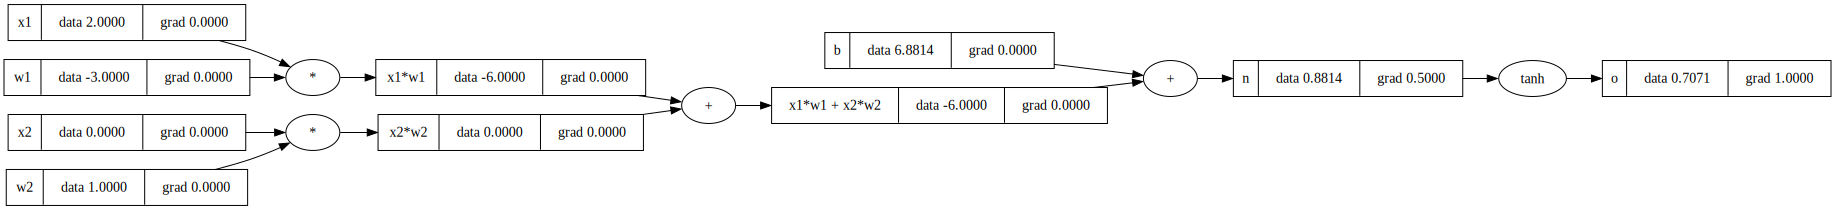

In [156]:
draw_dot(o)

In [157]:
n._backward()

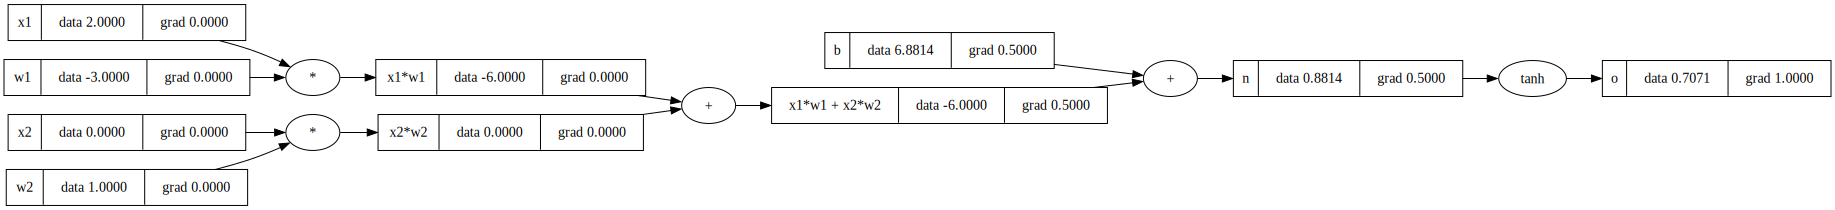

In [158]:
draw_dot(o)

In [159]:
b._backward()

In [160]:
x1w1x2w2._backward()

In [161]:
x2w2._backward()

In [162]:
x1w1._backward()

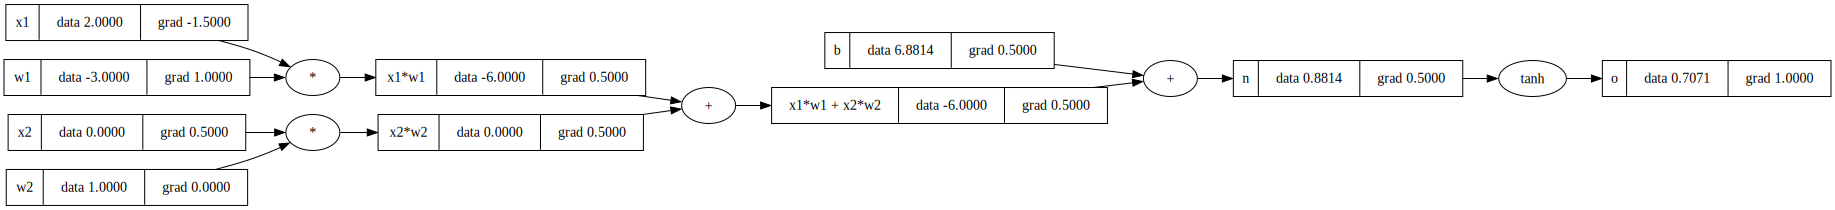

In [163]:
draw_dot(o)

Topological sort: 
Layout the graph so edges go left to right.

Will start at (o) and if not visited, will go through chilren nodes and then add itself. 

In [164]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o) # will only add o node once all children are in the list 
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

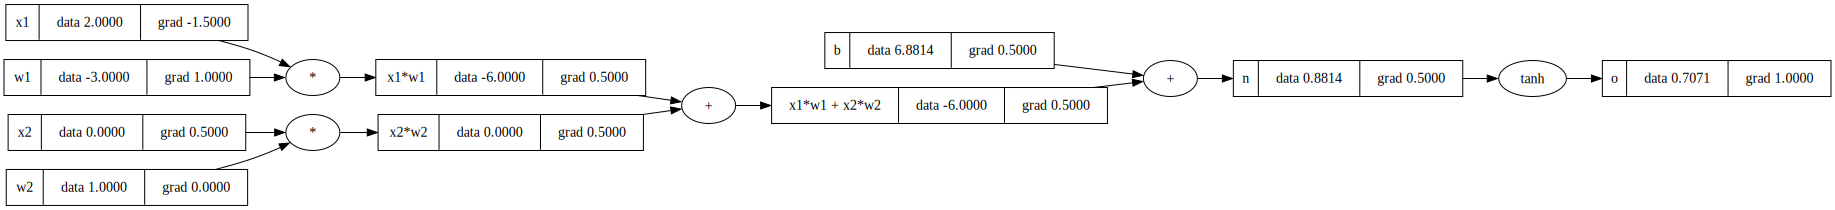

In [165]:
draw_dot(o)

To re-order correctly to map to graph: 

In [168]:
# redefine expression
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [169]:
# summary

o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o) # will only add o node once all children are in the list 
topo

for node in reversed(topo):
  node._backward()

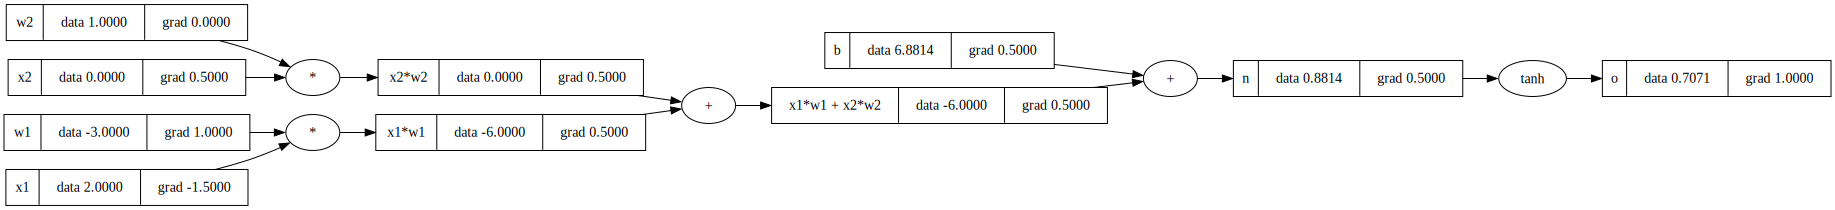

In [170]:
draw_dot(o)

Now insert into value class:

In [172]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label
        self._backward = lambda: None # by default doesnt do anything 

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        
    
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
        
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
    
        return out
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self) 
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [173]:
# redefine expression
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

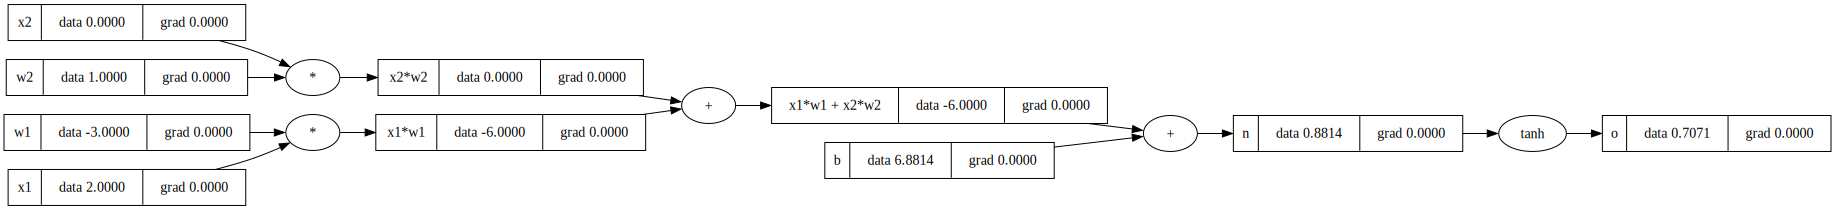

In [175]:
draw_dot(o)

In [176]:
o.backward()

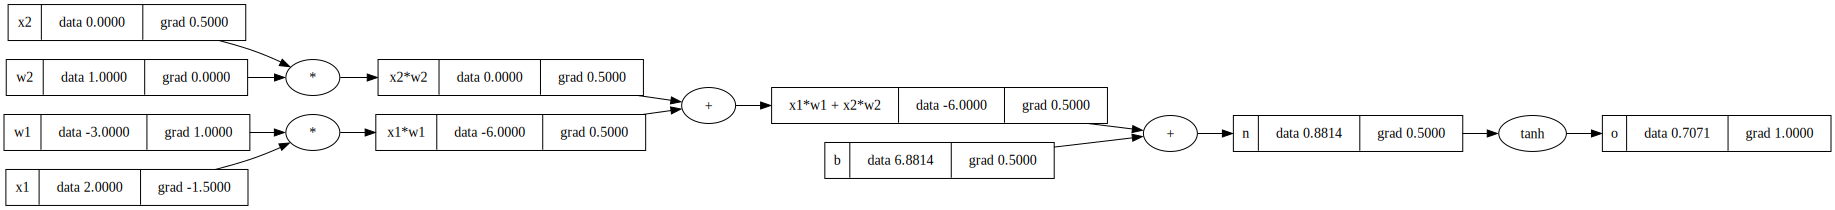

In [177]:
draw_dot(o)

 Error when using variables more than once and overrides gradients if use (=) in the class value, thus use (+=), so any contribution which flows backwards adds. 

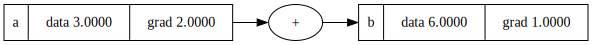

In [178]:

a= Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

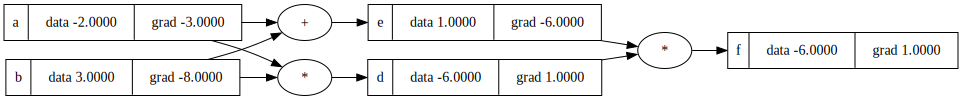

In [182]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

Now, adding numbers which are not value objects:

In [184]:
# error 
a = Value(2.0)
a + 1

AttributeError: 'int' object has no attribute 'data'

So modify this:

In [185]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label
        self._backward = lambda: None 

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # add value
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*") 
        
    
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
        
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
    
        return out
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self) 
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [186]:
a+1

Value(data=3.0)

Now apply to multiplication:

In [187]:
a*2

AttributeError: 'int' object has no attribute 'data'

In [190]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label
        self._backward = lambda: None 

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # add value
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # redefine value
        out = Value(self.data * other.data, (self, other), "*") 
        
    
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
        
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
    
        return out
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self) 
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [189]:
a*2
#a.__mul__(2)

Value(data=4.0)

In [191]:
# however this will not work
2*a 

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

Add rmul in value, to swap operands

In [192]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label
        self._backward = lambda: None 

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # add value
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # redefine value
        out = Value(self.data * other.data, (self, other), "*") 
        
    
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
        
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
    
        return out
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self) 
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
          
    def __rmul__(self, other): # other * self
        return self * other

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [193]:
2*a

Value(data=4.0)

Add expotentiate and divide

In [198]:
# divide
# a / b
# a * (1/b)
# a * (b**-1)
# implement x**k

In [225]:
class Value:

    def __init__(self, data, _children=(), _op='', label =''): 
        self.data = data
        self.grad = 0.0 # set grad
        self._prev = set(_children) 
        self._op  = _op
        self.label = label
        self._backward = lambda: None 

    def __repr__(self):
        # returns a string 
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # add value
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # redefine value
        out = Value(self.data * other.data, (self, other), "*") 
        
    
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out
    
    def __rmul__(self, other): # other * self
        return self * other
    
    def __truediv__(self, other): # self / other
        return self * other**-1
    
    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __radd__(self, other): # other + self
        return self + other 
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward
    
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad

        return out
    
    

    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self) 
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
          


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [196]:
a.exp()

Value(data=7.38905609893065)

In [224]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5)

Modify tanh into mathematically equivalent operations

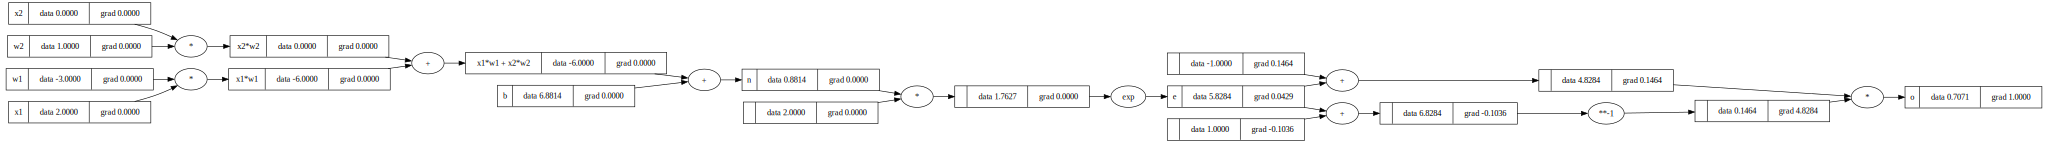

In [227]:
# redefine expression
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#_____________
e = (2*n).exp()
o = (e-1) / (e+1)
#_____________
e.label = 'e'
o.label = 'o'
o.backward()
draw_dot(o)